In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
pd.options.mode.chained_assignment = None

In [114]:
df = pd.read_csv("/Users/MinhLa/Desktop/school/Analyst_Case_Study/cyclistic.csv")

/var/folders/9s/v51xlz757f93sf6mwmf0fd0w0000gn/T/ipykernel_21750/3542252968.py:1: DtypeWarning:

Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.



In [115]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [116]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [117]:
df["rideable_type"].unique()

array(['docked_bike', 'electric_bike', 'classic_bike'], dtype=object)

In [118]:
df["member_casual"].unique()

array(['member', 'casual'], dtype=object)

In [119]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [120]:
df["ended_at"] = pd.to_datetime(df["ended_at"])
df["started_at"] = pd.to_datetime(df["started_at"])

In [121]:
#df['duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()#

df["duration"] = (df["ended_at"] - df["started_at"])
df["duration in minutes"] = df["duration"]/np.timedelta64(1,"D")*24*60

In [122]:
for x in ['duration in minutes']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = 0
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [123]:
df = df.dropna()

In [124]:
df["Started_DayInWeek"] = pd.DatetimeIndex(df["started_at"]).dayofweek
df["Started_Month"] = pd.DatetimeIndex(df["started_at"]).month
df["Started_Year"] = pd.DatetimeIndex(df["started_at"]).year

In [125]:
df["Started_DayInWeek"] = df["Started_DayInWeek"].replace({0 : "Monday",
                                                 1 : "Tuesday",
                                                 2 : "Wednesday",
                                                 3 : "Thursday",
                                                 4 : "Friday",
                                                 5 : "Saturday",
                                                 6 : "Sunday"})
df["Started_DayInWeek"] = pd.Categorical(df["Started_DayInWeek"], categories = [
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered = True)

In [126]:
df["End_DayInWeek"] = pd.DatetimeIndex(df["ended_at"]).dayofweek
df["End_Month"] = pd.DatetimeIndex(df["ended_at"]).month
df["End_Year"] = pd.DatetimeIndex(df["ended_at"]).year

In [127]:
df["End_DayInWeek"] = df["End_DayInWeek"].replace({0 : "Monday",
                                                 1 : "Tuesday",
                                                 2 : "Wednesday",
                                                 3 : "Thursday",
                                                 4 : "Friday",
                                                 5 : "Saturday",
                                                 6 : "Sunday"})
df["End_DayInWeek"] = pd.Categorical(df["End_DayInWeek"], categories = [
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered = True)

In [128]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,duration,duration in minutes,Started_DayInWeek,Started_Month,Started_Year,End_DayInWeek,End_Month,End_Year
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,...,-87.6586,member,0 days 00:26:49,26.816667,Sunday,4,2020,Sunday,4,2020
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,...,-87.7238,member,0 days 00:08:09,8.150000,Friday,4,2020,Friday,4,2020
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,...,-87.6230,member,0 days 00:14:23,14.383333,Wednesday,4,2020,Wednesday,4,2020
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,...,-87.6722,member,0 days 00:12:12,12.200000,Tuesday,4,2020,Tuesday,4,2020
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,...,-87.6547,casual,0 days 00:52:55,52.916667,Saturday,4,2020,Saturday,4,2020


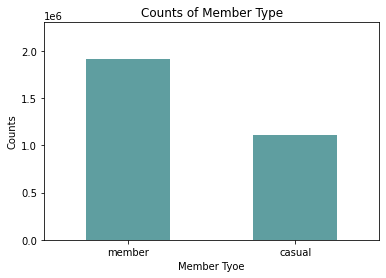

In [129]:
df["member_casual"].value_counts().plot.bar(color = "cadetblue")
plt.title("Counts of Member Type")
plt.xlabel("Member Tyoe")
plt.ylabel("Counts")
plt.xticks(rotation = 0)
plt.axis(ymin=0,ymax=2300000)
plt.show()

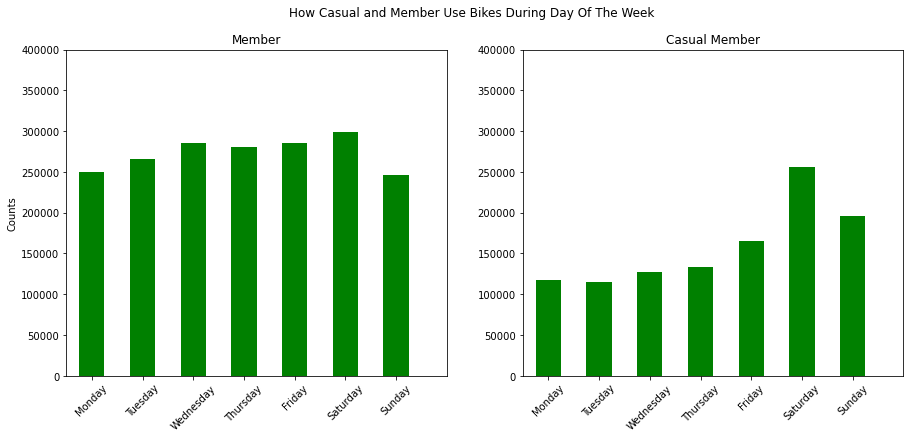

In [155]:
fig, axes = plt.subplots(
                     ncols=2,
                     nrows=1,
                     figsize=(15, 6))
fig.suptitle("How Casual and Member Use Bikes During Day Of The Week")
ax1, ax2 = axes.flatten()
df[df["member_casual"] == "member"]["Started_DayInWeek"].value_counts().sort_index().plot(ax = ax1, kind = "bar", title = "Member", ylabel = "Counts", width=0.5,color = "green")
df[df["member_casual"] == "casual"]["Started_DayInWeek"].value_counts().sort_index().plot(ax = ax2, kind = "bar", title = "Casual Member", width=0.5,color = "green")

ax1.axis(ymin=0,ymax=400000)
ax1.axis(xmin=-0.5,xmax=7)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax2.axis(ymin=0,ymax=400000)
ax2.axis(xmin=-0.5,xmax=7)
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)

In [197]:
print (quant_25, quant_50, quant_75)

6.566666666666667 11.449999999999998 19.75


Text(0.5, 1.0, 'Duration In Minutes of Member')

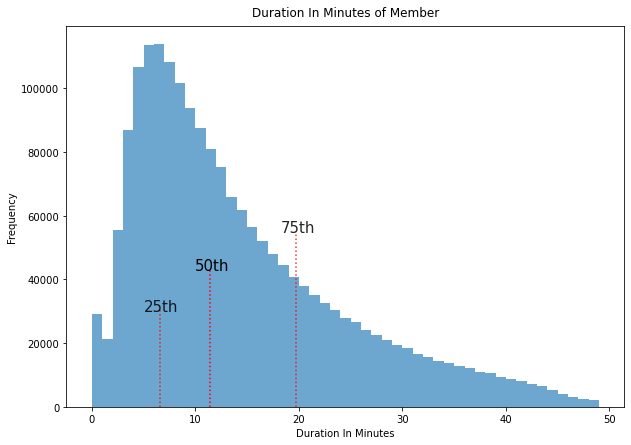

In [200]:
fig, ax = plt.subplots(figsize = (10,7))

df[df["member_casual"] == "member"]["duration in minutes"].plot(kind = "hist", bins=range(50), alpha = 0.65)
quant_25, quant_50, quant_75 = df[df["member_casual"] == "member"]["duration in minutes"].quantile(0.25), df[df["member_casual"] == "member"]["duration in minutes"].quantile(0.5), df[df["member_casual"] == "member"]["duration in minutes"].quantile(0.75)
quants = [[quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46]]
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color = "red")
    

ax.text(quant_25-1.5, 30000,"25th", size = 15, alpha = 0.85)
ax.text(quant_50-1.5, 43000, "50th", size = 15, alpha = 1)
ax.text(quant_75-1.5, 55000, "75th", size = 15, alpha = 0.85)


ax.set_xlabel("Duration In Minutes")
ax.set_title("Duration In Minutes of Member", pad = 10)

Text(0.5, 1.0, 'Duration In Minutes of Casual Member')

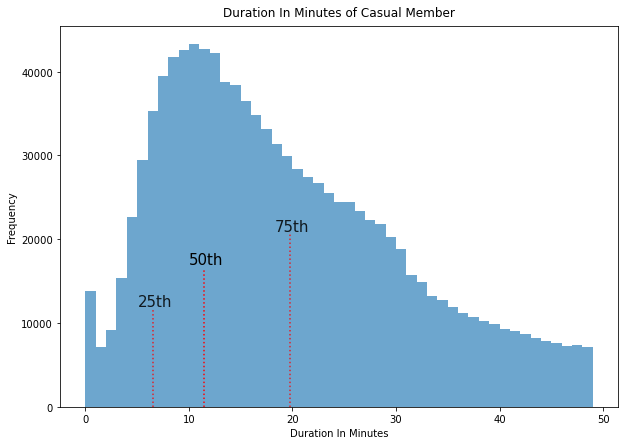

In [203]:
fig, ax = plt.subplots(figsize = (10,7))

df[df["member_casual"] == "casual"]["duration in minutes"].plot(kind = "hist", bins=range(50), alpha = 0.65)
quant_25, quant_50, quant_75 = df[df["member_casual"] == "member"]["duration in minutes"].quantile(0.25), df[df["member_casual"] == "member"]["duration in minutes"].quantile(0.5), df[df["member_casual"] == "member"]["duration in minutes"].quantile(0.75)
quants = [[quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46]]
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color = "red")
    

ax.text(quant_25-1.5, 12000,"25th", size = 15, alpha = 0.85)
ax.text(quant_50-1.5, 17000, "50th", size = 15, alpha = 1)
ax.text(quant_75-1.5, 21000, "75th", size = 15, alpha = 0.85)

ax.set_xlabel("Duration In Minutes")
ax.set_title("Duration In Minutes of Casual Member", pad = 10)

In [151]:
df["member_casual"].value_counts()

member    1913733
casual    1110326
Name: member_casual, dtype: int64

In [152]:
1110326/1913733

0.5801885633993875

<h2> How Casual and Member Ride Differently?

According to the data, the company has a total of 1110326 casual member who are the people that is aware of the service that the company is offering. But, they are not a member of the company. Our goal here is to convert Casual Member into the Actual Member of our company, which will directly help improving the revenue. According to the graph, "How Casual and Member Use Bikes During Day Of The Week," we can clearly see that Member uses our bikes through the week from Monday to Sunday. It seems to distributed evenly. On the other hands, Casual Member most likely to use our service on the weekend as the graph clearly show two of highest columns are on Saturday and Sunday. One of the common facts that both the Member and Casual Member share together is that 75% of the trips are less than 20 minutes, according to the charts, "Duration In Minutes of Casual Member" and "Duration In Minutes of Member." Based on these 2 facts, what we can do is to target our Potential group, which are the Casual Member who use our service on the weekend and less than 20 minutes. We can use promotion to encourage this group to become our Member. An